In [1]:
# 1. Load dataset, split into training and testing sets, apply Logistic Regression, and print accuracy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample dataset (Iris)
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
# 2. Apply L1 regularization (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("L1 Regularization Accuracy:", accuracy_score(y_test, y_pred))


L1 Regularization Accuracy: 1.0


In [3]:
# 3. Apply L2 regularization (Ridge)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("L2 Regularization Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:", model.coef_)

L2 Regularization Accuracy: 1.0
Coefficients: [[-0.39347744  0.96248927 -2.37513361 -0.99874691]
 [ 0.50844553 -0.2548109  -0.21300984 -0.77574616]
 [-0.11496809 -0.70767836  2.58814346  1.77449307]]


In [4]:
# 4. Apply Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train, y_train)
print("Elastic Net Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Elastic Net Accuracy: 1.0


C:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
# 5. Train Logistic Regression for multiclass classification using OvR
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
print("Multiclass OvR Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Multiclass OvR Accuracy: 0.9666666666666667


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
# 6. Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334


In [7]:
# 7. Evaluate using Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Stratified K-Fold Accuracy:", score.mean())

Stratified K-Fold Accuracy: 0.9466666666666667


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be rem

In [10]:
# 8. Load dataset from CSV and apply Logistic Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "Car Sale.csv"
df = pd.read_csv(file_path)

# Encode Gender (Target Variable)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 0, Female = 1

# Selecting relevant features (dropping non-informative columns like 'Phone')
features = ['Annual Income', 'Price ($)']  # Add more relevant features if needed
X = df[features]
y = df['Gender']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7863


In [11]:
# 9. Apply RandomizedSearchCV for tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(), param_dist, cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)
print("Best Randomized Search Parameters:", random_search.best_params_)


Best Randomized Search Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


In [12]:
# 10. One-vs-One (OvO) Multiclass Logistic Regression
from sklearn.multiclass import OneVsOneClassifier
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train, y_train)
print("One-vs-One Accuracy:", accuracy_score(y_test, ovo_model.predict(X_test)))


One-vs-One Accuracy: 0.7862818904224174


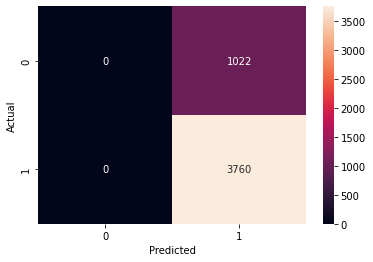

In [13]:
# 11. Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
# 12. Precision, Recall, and F1-score evaluation
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1022
           1       0.79      1.00      0.88      3760

    accuracy                           0.79      4782
   macro avg       0.39      0.50      0.44      4782
weighted avg       0.62      0.79      0.69      4782



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# 13. Handling imbalanced data with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
print("Imbalanced Data Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Imbalanced Data Accuracy: 0.5023002927645337


In [19]:
# 14. Train Logistic Regression on Titanic dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
df = pd.read_csv('titanic.csv')

# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical variables

# Split features and target variable
X = df.drop(columns=['Survived'])  # Ensure 'Survived' is the target variable
y = df['Survived']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Titanic Dataset Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Titanic Dataset Logistic Regression Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [20]:
# 15. Feature scaling before training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
print("Accuracy with Scaling:", accuracy_score(y_test, model.predict(X_test_scaled)))


Accuracy with Scaling: 0.8044692737430168


In [21]:
# 16. Evaluate using ROC-AUC score
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.8761904761904762


In [22]:
# 17. Train with custom learning rate (C=0.5)
model = LogisticRegression(C=0.5)
model.fit(X_train, y_train)
print("Accuracy with C=0.5:", accuracy_score(y_test, model.predict(X_test)))

Accuracy with C=0.5: 0.8044692737430168


In [23]:
# 18. Identify important features based on coefficients
import numpy as np
feature_importance = np.abs(model.coef_).sum(axis=0)
print("Feature Importance:", feature_importance)


Feature Importance: [0.09227397 0.77556808 0.38720734 0.31169845 0.10217278 0.12494707
 1.27429771 0.04732996 0.19720827]


In [24]:
# 19. Evaluate using Cohen’s Kappa Score
from sklearn.metrics import cohen_kappa_score
print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen’s Kappa Score: 0.5944196284068104


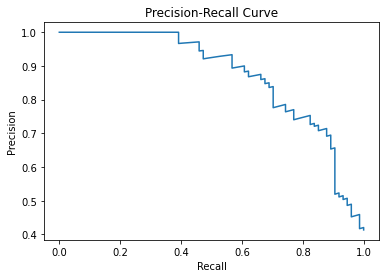

In [25]:
# 20. Visualize Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [26]:
# 21. Train with different solvers and compare accuracy
for solver in ['liblinear', 'saga', 'lbfgs']:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", accuracy_score(y_test, model.predict(X_test)))


Accuracy with liblinear solver: 0.8044692737430168
Accuracy with saga solver: 0.8044692737430168
Accuracy with lbfgs solver: 0.8044692737430168


In [27]:
# 22. Evaluate using Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
print("MCC Score:", matthews_corrcoef(y_test, y_pred))


MCC Score: 0.5947791436333295


In [28]:
# 23. Compare raw vs standardized data accuracy
model.fit(X_train, y_train)
print("Raw Data Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Raw Data Accuracy: 0.8044692737430168


In [29]:
# 24. Find optimal C using cross-validation
from sklearn.model_selection import cross_val_score
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(C=c)
    score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Accuracy for C={c}:", score.mean())


Accuracy for C=0.01: 0.7963163596966414
Accuracy for C=0.1: 0.7976952624839948
Accuracy for C=1: 0.7934699103713188
Accuracy for C=10: 0.790662858268492


In [31]:
# 25. Save and load model using joblib
import joblib
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_model.pkl')
loaded_model = joblib.load('logistic_model.pkl')
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))

Loaded Model Accuracy: 0.8044692737430168
